In [1]:
import numpy as np
from scipy.integrate import odeint as oi
from matplotlib import pyplot as plt

In [52]:
def model(x, t, p):
    #rapamycin treatment: mTOR_tot=0.1 
    mTOR_tot = 1
    #siULK1: ULK1_tot=0.01 reduced ULK1: ULK1_tot=0.3
    ULK1_tot = 1
    #siPP2A: PP2A_tot=0.01 Okadaic acid: PP2A_tot=0.1
    PP2A_tot = .1

    mTOR = x[0] 
    ULK1 = x[1]
    PP2A = x[2]
    
    kamtor = 1.5
    kimtor = 0.01
    kaulk = 0.15
    kiulk = 0.15
    kapp2 = 0.15
    kipp2 = 0.15

    kimtor1 = p[0]
    kimtor2 = p[1]
    kaulk1 = p[2]
    kiulk1 = p[3]
    kapp21 = p[4]
    kipp22 = p[5]
    
    dmTORdt = kamtor*(mTOR_tot-mTOR)-kimtor*mTOR-kimtor1*mTOR*ULK1-kimtor2*mTOR*PP2A
    dULK1dt = kaulk*(ULK1_tot-ULK1)-kiulk*ULK1+kaulk1*(ULK1_tot-ULK1)*PP2A-kiulk1*ULK1*mTOR
    dPP2Adt = kapp2*(PP2A_tot-PP2A)-kipp2*PP2A+kapp21*(PP2A_tot-PP2A)*ULK1-kipp22*PP2A*mTOR
    
    dxdt = [dmTORdt, dULK1dt, dPP2Adt]
    
    return dxdt

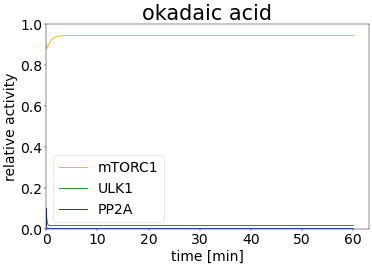

In [53]:
t = np.arange(0, 60, 0.01)

IC = [0.9,0.1,0.1]
params=[5.16733842, 0.01, 2.85833946,  9.74873293, 14.4792405, 46.40777268]

z = oi(model, IC, t, args=(params,)).T

title = 'okadaic acid'
font=25
plt.ylim(0,1)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rcParams["figure.figsize"] = [10.4, 6.8]
plt.rcParams["figure.dpi"] = 40
plt.rcParams["figure.facecolor"]=(1,1,1)

plt.title(title,fontsize = font*1.5)
plt.xlabel('time [min]', fontsize=font)
plt.ylabel('relative activity',fontsize=font)
plt.plot(t, z[0], '-', color='orange',label='mTORC1')

plt.plot(t, z[1], 'g-',label = 'ULK1')
plt.plot(t, z[2], 'b-',label='PP2A')

plt.xlim(xmin=0)
plt.legend(fontsize=font)
plt.savefig('./figures/'+title)
plt.show()
